In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [94]:
df=pd.read_csv("./Datasets/16milliontweets.csv")

In [95]:
df.columns = ['sentiment','ID','date','query','user','tweet']
df.head()

,sentiment,ID,date,query,user,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [96]:
df.drop(['ID','date','query','user'],axis=1,inplace=True)

In [97]:
df.replace([4],[1,],inplace=True)

df.sentiment.astype = 'int64'

In [98]:
df.head()

,sentiment,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   tweet      1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


<AxesSubplot:ylabel='Frequency'>

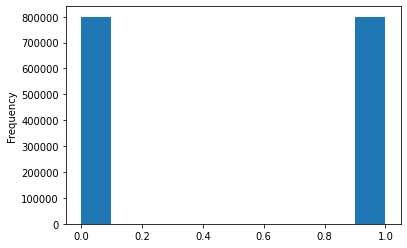

In [100]:
df.sentiment.plot(kind='hist')

([<matplotlib.patches.Wedge at 0x236112c1520>,
 [Text(-1.0298943278188544e-06, 1.099999999999518, '1'),
  Text(1.0298943279283923e-06, -1.099999999999518, '0')],
 [Text(-5.617605424466478e-07, 0.599999999999737, '50.0%'),
  Text(5.617605425063958e-07, -0.599999999999737, '50.0%')])

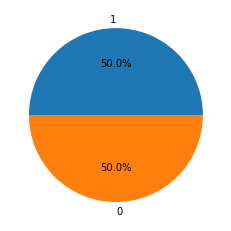

In [101]:
plt.pie(df.sentiment.value_counts(),labels=df.sentiment.value_counts().index,autopct='%1.1f%%')

In [102]:
df1 = df

df11 = df1.iloc[:100000]
df22 = df1.iloc[-100000:]

df = pd.concat([df11,df22])

In [103]:
df.shape

(200000, 2)

In [104]:
df["sentiment"].value_counts()

0    100000
1    100000
Name: sentiment, dtype: int64

In [105]:
df.isnull().sum()

sentiment    0
tweet        0
dtype: int64

In [106]:
#  Preprocessing
import re
from nltk.corpus import stopwords
stopword = stopwords.words('english')

from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()

In [107]:
def transform_text(text):
    text=text.lower()
    text  = re.sub(r'[^\w\s\!]','',text)
    text = nltk.tokenize.RegexpTokenizer(r'\w+|\!').tokenize(text)
    text = [x for x in text if x not in stopword]

    text = [wl.lemmatize(x,'v') for x in text ]
    return " ".join(text)
    

In [108]:
#  sample Transformation

print("Actual Text:",df.tweet[0])
print("Transformed Text:",transform_text(df.tweet[0]))
print("Actual Text:",df.tweet[899])
print("Transformed Text:",transform_text(df.tweet[899]))
print("Actual Text:",df.tweet[45])
print("Transformed Text:",transform_text(df.tweet[45]))

Actual Text: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Transformed Text: upset cant update facebook texting might cry result school today also blah !
Actual Text: so far i have 311 veiws on all my sites put together,  most of them were me checking out the updates i made......
Transformed Text: far 311 veiws sit put together check update make
Actual Text: Just checked my user timeline on my blackberry, it looks like the twanking is still happening  Are ppl still having probs w/ BGs and UIDs?
Transformed Text: check user timeline blackberry look like twanking still happen ppl still probs w bgs uids


In [109]:
df['final_text']=df['tweet'].apply(transform_text)

In [110]:
df.head()

,sentiment,tweet,final_text
0,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
1,0,@Kenichan I dived many times for the ball. Man...,kenichan dive many time ball manage save 50 re...
2,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behave im mad cant see
4,0,@Kwesidei not the whole crew,kwesidei whole crew


In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.final_text,df.sentiment,test_size=0.2)

In [112]:
print(f" X_train shape = {X_train.shape}")
print(f" X_test shape = {X_test.shape}")

 X_train shape = (160000,)
 X_test shape = (40000,)


In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [114]:

cv=CountVectorizer(stop_words="english" , max_df=5000 ,  max_features=3000000 ,lowercase=True , ngram_range=(1,5) )
x_train_cnt=cv.fit_transform(X_train.values)

model=MultinomialNB()
model.fit(x_train_cnt,y_train)


x_test_cnt=cv.transform(X_test)
model.score(x_test_cnt,y_test)



0.764125

In [116]:
tweets=[
    'hey this is a very good car i love it , color is also good',
    'instagram reels are the worst update by facebook , it is totally worthless and need to throw in garbage',
]
tweets_cnt=cv.transform(tweets)
model.predict(tweets_cnt)

array([1, 0], dtype=int64)

0.545